In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     Pedigree  Age  Outcome  
0       0.627   50        1  
1       0.351   3

In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
X=df.drop(columns=['Outcome'],axis=1)

In [9]:
y=df['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [31]:
knn = KNeighborsClassifier(n_neighbors=4)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [33]:
y_pred = knn.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [35]:
acc=accuracy_score(y_test,y_pred)
acc

0.6510416666666666

In [36]:
precision = precision_score(y_test,y_pred)
precision

0.42857142857142855

In [37]:
recall = recall_score(y_test,y_pred)
recall

0.140625

In [38]:
err = 1-acc
err

0.34895833333333337

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  18],
       [ 34,  36]])

In [47]:
def knn(X_train,X_test,y_train,y_test,n):
    n_range = range(1,n)
    results=[]
    for n in n_range:
        knn=KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test,y_pred)
        results.append(acc)
    return results

In [48]:
import matplotlib.pyplot as plt

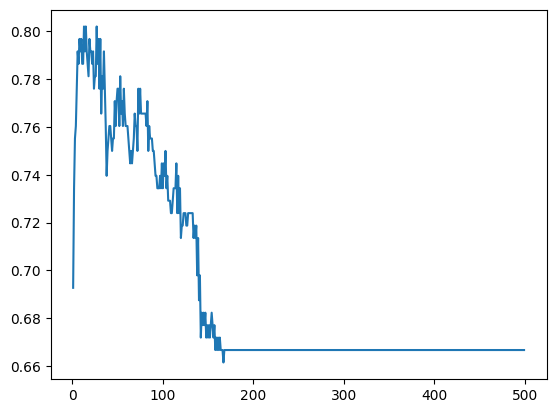

In [50]:
n=500
output = knn(X_train,X_test,y_train,y_test,n)
r = range(1,n)
plt.plot(r,output)